# Text Classification with PySpark

## MultiClass Text Classification

Dataset from Kaggle: https://www.kaggle.com/datasets/andrewmvd/udemy-courses

# Uses of Text Classification

Below are some key business applications of Text Classification:

- **Customer Support Automation**: Automatically classifying customer queries to route them to the appropriate support channels, enhancing response times and reducing costs.

- **Sentiment Analysis**: Analyzing customer feedback, reviews, and social media content to gauge public sentiment towards products or services, guiding business decisions.

- **Spam Detection**: Filtering spam and phishing messages from communication platforms, improving user experience and security.

- **Content Moderation**: Automatically categorizing and moderating user-generated content to maintain community standards and protect brand reputation.

- **Document Classification**: Organizing and classifying documents (e.g., legal, research) for easier retrieval and management.

- **Personalized Recommendations**: Classifying user behavior and preferences to enhance recommendation systems, increasing engagement and conversion rates.

- **Market Research Insights**: Analyzing and categorizing data from surveys and forums to identify customer trends and preferences.

- **News Categorization**: Automatically classifying news articles into relevant topics for better user navigation and retention.

- **Fraud Detection**: Identifying potentially fraudulent transactions by classifying textual descriptions based on historical data.

- **Brand Monitoring**: Classifying online mentions of a brand to assess sentiment and manage reputation proactively.

- **Survey Analysis**: Classifying responses from open-ended survey questions to derive actionable insights from qualitative data.

# Uses of PySpark

PySpark is a powerful tool for handling large-scale data processing and machine learning, making it an ideal choice for busniesses with large amounts of data. Here are several reasons to use PySpark:

- **Scalability**: PySpark can efficiently process large datasets that exceed the memory capacity of a single machine by distributing the workload across a cluster of machines.

- **Speed**: Leveraging in-memory processing capabilities, PySpark offers faster execution times compared to traditional disk-based data processing frameworks.

- **Ease of Use**: PySpark provides a familiar interface for Python users, allowing them to apply their existing Python knowledge to big data tasks with ease.

- **Integration with Other Tools**: PySpark can easily integrate with various big data tools, such as Hadoop and Apache Kafka, facilitating seamless data ingestion and processing.

- **Built-in Machine Learning Library**: PySpark's MLlib provides a rich set of machine learning algorithms and utilities specifically optimized for big data, simplifying the implementation of text classification models.

- **Support for Streaming Data**: PySpark can handle real-time data streams, making it suitable for applications that require immediate processing of incoming text data (e.g., social media sentiment analysis).

- **Rich DataFrame API**: PySpark’s DataFrame API allows for efficient data manipulation and transformation, enabling users to preprocess and clean text data before classification.



In [1]:
# Load Pkgs
from pyspark import SparkContext

In [2]:
sc = SparkContext(master="local[2]")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/02 17:54:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/10/02 17:54:24 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
# Launch UI
sc

<SparkContext master=local[2] appName=pyspark-shell>

In [4]:
# Create A Spark Session
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.appName("TextClassifierwithPySpark").getOrCreate()

In [6]:
# Load Our Dataset
df = spark.read.csv("data/udemy_courses_clean.csv",header=True,inferSchema=True)

In [7]:
df.show()

+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|_c0|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration| published_timestamp|         subject|  clean_course_title|
+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|  0|  1070968|Ultimate Investme...|https://www.udemy...|   True|  200|           2147|         23|          51|        All Levels|       1.5 hours|2017-01-18T20:58:58Z|Business Finance|Ultimate Investme...|
|  1|  1113822|Complete GST Cour...|https://www.udemy...|   True|   75|           2792|        923|         274|        All Levels|        39 hours|2017-03-09T16:34:20Z

24/10/02 17:54:28 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , course_id, course_title, url, is_paid, price, num_subscribers, num_reviews, num_lectures, level, content_duration, published_timestamp, subject, clean_course_title
 Schema: _c0, course_id, course_title, url, is_paid, price, num_subscribers, num_reviews, num_lectures, level, content_duration, published_timestamp, subject, clean_course_title
Expected: _c0 but found: 
CSV file: file:///Users/pramodkondur/Desktop/pysparktutorial/data/udemy_courses_clean.csv


In [8]:
# Columns
df.columns

['_c0',
 'course_id',
 'course_title',
 'url',
 'is_paid',
 'price',
 'num_subscribers',
 'num_reviews',
 'num_lectures',
 'level',
 'content_duration',
 'published_timestamp',
 'subject',
 'clean_course_title']

In [9]:
# Select Columns
df.select('course_title','subject').show()

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
|Trading Penny Sto...|Business Finance|
|Investing And Tra...|Business Finance|
|Trading Stock Cha...|Business Finance|
|Options Trading 3...|Business Finance|
|The Only Investme...|Business Finance|
|Forex Trading Sec...|Business Finance|
|Trading Options W...|Business Finance|
|Financial Managem...|Business Finance|
|Forex Trading Cou...|Business Finance|
|Python Algo Tradi...|Business Finance|
|Short Selling: Le...|Business Finance|
|Basic Technical A...|Business Finance|
|The Complete Char...|Business Finance|
|7 Deadly Mistakes...|Business Finance|
|Financial Stateme...|Business Finance|
+--------------------+----------------+
only showing top 20 rows



In [10]:
df = df.select('course_title','subject')

In [11]:
df.show(5)

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
+--------------------+----------------+
only showing top 5 rows



In [12]:
# Value Counts
df.groupBy('subject').count().show()

+--------------------+-----+
|             subject|count|
+--------------------+-----+
|play Electric Gui...|    1|
|Multiply returns ...|    1|
|                NULL|    6|
|    Business Finance| 1198|
|Introduction Guit...|    1|
|Learn Play Fernan...|    1|
|      Graphic Design|  603|
|Aprende tocar el ...|    1|
|     Web Development| 1200|
|Learn Classical G...|    1|
| Musical Instruments|  676|
+--------------------+-----+



In [13]:
# Value Counts via pandas
df.toPandas()['subject'].value_counts()

subject
Web Development                                                                                                                                                                                              1200
Business Finance                                                                                                                                                                                             1198
Musical Instruments                                                                                                                                                                                           676
Graphic Design                                                                                                                                                                                                603
Multiply returns Value Investinghttpswwwudemycommultiplyyourreturnsusingvalueinvestingtrue2019421963All Levels45 hours20150723T000833Z 874284Weekly Fore

In [14]:
# Removing the subjects where value counts is 1

df = df.where(df.subject.isin(df.groupBy('subject').count().filter('count > 1').select('subject').rdd.flatMap(lambda x: x).collect()))
df.toPandas()['subject'].value_counts()

subject
Web Development        1200
Business Finance       1198
Musical Instruments     676
Graphic Design          603
Name: count, dtype: int64

In [15]:
# Check For Missing Values
df.toPandas()['subject'].isnull().sum()

np.int64(0)

In [16]:
df.show(5)

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
+--------------------+----------------+
only showing top 5 rows



### Feature Extraction
#### Build Features From Text
+ CountVectorizer
+ TFIDF
+ WordEmbedding
+ HashingTF
+ etc

In [17]:
# Load Our Pkgs
import pyspark.ml.feature

In [18]:
dir(pyspark.ml.feature)

['Any',
 'Binarizer',
 'BucketedRandomProjectionLSH',
 'BucketedRandomProjectionLSHModel',
 'Bucketizer',
 'ChiSqSelector',
 'ChiSqSelectorModel',
 'CountVectorizer',
 'CountVectorizerModel',
 'DCT',
 'DataFrame',
 'DenseMatrix',
 'DenseVector',
 'Dict',
 'ElementwiseProduct',
 'FeatureHasher',
 'Generic',
 'HasFeaturesCol',
 'HasHandleInvalid',
 'HasInputCol',
 'HasInputCols',
 'HasLabelCol',
 'HasMaxIter',
 'HasNumFeatures',
 'HasOutputCol',
 'HasOutputCols',
 'HasRelativeError',
 'HasSeed',
 'HasStepSize',
 'HasThreshold',
 'HasThresholds',
 'HashingTF',
 'IDF',
 'IDFModel',
 'Imputer',
 'ImputerModel',
 'IndexToString',
 'Interaction',
 'JM',
 'JavaEstimator',
 'JavaMLReadable',
 'JavaMLWritable',
 'JavaModel',
 'JavaParams',
 'JavaTransformer',
 'List',
 'MaxAbsScaler',
 'MaxAbsScalerModel',
 'MinHashLSH',
 'MinHashLSHModel',
 'MinMaxScaler',
 'MinMaxScalerModel',
 'NGram',
 'Normalizer',
 'OneHotEncoder',
 'OneHotEncoderModel',
 'Optional',
 'P',
 'PCA',
 'PCAModel',
 'Param',
 '

In [19]:
# Load Our Transformer & Extractor Pkgs
from pyspark.ml.feature import Tokenizer,StopWordsRemover,CountVectorizer,IDF
from pyspark.ml.feature import StringIndexer

In [20]:
df.show(5)

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
+--------------------+----------------+
only showing top 5 rows



In [21]:
# Stages For the Pipeline
tokenizer = Tokenizer(inputCol='course_title',outputCol='mytokens')
stopwords_remover = StopWordsRemover(inputCol='mytokens',outputCol='filtered_tokens')
vectorizer = CountVectorizer(inputCol='filtered_tokens',outputCol='rawFeatures')
idf = IDF(inputCol='rawFeatures',outputCol='vectorizedFeatures')


In [22]:
# LabelEncoding/LabelIndexing
labelEncoder = StringIndexer(inputCol='subject',outputCol='label').fit(df)

In [23]:
labelEncoder.transform(df).show(5)

+--------------------+----------------+-----+
|        course_title|         subject|label|
+--------------------+----------------+-----+
|Ultimate Investme...|Business Finance|  1.0|
|Complete GST Cour...|Business Finance|  1.0|
|Financial Modelin...|Business Finance|  1.0|
|Beginner to Pro -...|Business Finance|  1.0|
|How To Maximize Y...|Business Finance|  1.0|
+--------------------+----------------+-----+
only showing top 5 rows



In [24]:
labelEncoder.labels

['Web Development',
 'Business Finance',
 'Musical Instruments',
 'Graphic Design']

In [25]:
# Dict of Labels
label_dict = {'Web Development':0.0,
 'Business Finance':1.0,
 'Musical Instruments':2.0,
 'Graphic Design':3.0}

In [26]:
df.show()

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
|Trading Penny Sto...|Business Finance|
|Investing And Tra...|Business Finance|
|Trading Stock Cha...|Business Finance|
|Options Trading 3...|Business Finance|
|The Only Investme...|Business Finance|
|Forex Trading Sec...|Business Finance|
|Trading Options W...|Business Finance|
|Financial Managem...|Business Finance|
|Forex Trading Cou...|Business Finance|
|Python Algo Tradi...|Business Finance|
|Short Selling: Le...|Business Finance|
|Basic Technical A...|Business Finance|
|The Complete Char...|Business Finance|
|7 Deadly Mistakes...|Business Finance|
|Financial Stateme...|Business Finance|
+--------------------+----------------+
only showing top 20 rows



In [27]:
df = labelEncoder.transform(df)

In [28]:
df.show(5)

+--------------------+----------------+-----+
|        course_title|         subject|label|
+--------------------+----------------+-----+
|Ultimate Investme...|Business Finance|  1.0|
|Complete GST Cour...|Business Finance|  1.0|
|Financial Modelin...|Business Finance|  1.0|
|Beginner to Pro -...|Business Finance|  1.0|
|How To Maximize Y...|Business Finance|  1.0|
+--------------------+----------------+-----+
only showing top 5 rows



In [29]:
### Split Dataset
(trainDF,testDF) = df.randomSplit((0.7,0.3),seed=42)

In [30]:
trainDF.show()

+--------------------+-------------------+-----+
|        course_title|            subject|label|
+--------------------+-------------------+-----+
|#1 Piano Hand Coo...|Musical Instruments|  2.0|
|#10 Hand Coordina...|Musical Instruments|  2.0|
|#4 Piano Hand Coo...|Musical Instruments|  2.0|
|#5  Piano Hand Co...|Musical Instruments|  2.0|
|#6 Piano Hand Coo...|Musical Instruments|  2.0|
|'Geometry Of Chan...|   Business Finance|  1.0|
|1 - Concepts of S...|   Business Finance|  1.0|
|          1 Hour CSS|    Web Development|  0.0|
|         1 Hour HTML|    Web Development|  0.0|
|10 Numbers Every ...|   Business Finance|  1.0|
|10.  Bonds and Bo...|   Business Finance|  1.0|
|101 Awesome Rocka...|Musical Instruments|  2.0|
|15  Motion Graphi...|     Graphic Design|  3.0|
|150 Rock Guitar L...|Musical Instruments|  2.0|
|188% Profit in 1Y...|   Business Finance|  1.0|
|2 Easy Steps To I...|   Business Finance|  1.0|
|2. Principles of ...|   Business Finance|  1.0|
|3. Compound Inter..

In [31]:
### Estimator
from pyspark.ml.classification import LogisticRegression

In [32]:
lr = LogisticRegression(featuresCol='vectorizedFeatures',labelCol='label')

#### Building the Pipeline

In [33]:
from pyspark.ml import Pipeline

In [34]:
pipeline = Pipeline(stages=[tokenizer,stopwords_remover,vectorizer,idf,lr])

In [35]:
pipeline

Pipeline_3b60d21f7918

In [36]:
pipeline.stages

Param(parent='Pipeline_3b60d21f7918', name='stages', doc='a list of pipeline stages')

In [37]:
# Building MOdel
lr_model = pipeline.fit(trainDF)

24/10/02 17:54:35 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/10/02 17:54:35 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


In [38]:
lr_model

PipelineModel_6a8724b002bc

In [39]:
# Predictions on our Test Dataset
predictions = lr_model.transform(testDF)

In [40]:
predictions.show()

+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|        course_title|            subject|label|            mytokens|     filtered_tokens|         rawFeatures|  vectorizedFeatures|       rawPrediction|         probability|prediction|
+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|#12 Hand Coordina...|Musical Instruments|  2.0|[#12, hand, coord...|[#12, hand, coord...|(3678,[343,436,60...|(3678,[343,436,60...|[1.16788884186142...|[0.01177597171269...|       2.0|
|#7 Piano Hand Coo...|Musical Instruments|  2.0|[#7, piano, hand,...|[#7, piano, hand,...|(3678,[11,14,67,3...|(3678,[11,14,67,3...|[-7.7823174672125...|[4.11260421244438...|       2.0|
|'Greensleeves' Cr...|Musical Instruments|  2.0|['greensleeves', ...|[

In [41]:
# Select Columns
predictions.columns

['course_title',
 'subject',
 'label',
 'mytokens',
 'filtered_tokens',
 'rawFeatures',
 'vectorizedFeatures',
 'rawPrediction',
 'probability',
 'prediction']

In [42]:
predictions.select('rawPrediction','probability','subject','label','prediction').show(10)

+--------------------+--------------------+-------------------+-----+----------+
|       rawPrediction|         probability|            subject|label|prediction|
+--------------------+--------------------+-------------------+-----+----------+
|[1.16788884186142...|[0.01177597171269...|Musical Instruments|  2.0|       2.0|
|[-7.7823174672125...|[4.11260421244438...|Musical Instruments|  2.0|       2.0|
|[-4.4469063634455...|[1.58098475538369...|Musical Instruments|  2.0|       2.0|
|[-5.3155910059987...|[2.93792436713131...|   Business Finance|  1.0|       1.0|
|[16.1945922425321...|[0.99999999162671...|    Web Development|  0.0|       0.0|
|[14.0742277379161...|[0.99999986007479...|    Web Development|  0.0|       0.0|
|[-2.8532251648916...|[2.17130199457991...|   Business Finance|  1.0|       1.0|
|[-5.2745611287237...|[3.10932089774678...|Musical Instruments|  2.0|       2.0|
|[-5.4065920978637...|[2.54461337786652...|   Business Finance|  1.0|       1.0|
|[-14.392026909903...|[5.664

### Model Evaluation
+ Accuracy
+ Precision
+ F1score
+ etc


In [43]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [44]:
evaluator = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='accuracy')

In [45]:
accuracy = evaluator.evaluate(predictions)

In [46]:
accuracy

0.909437559580553

In [47]:
#### Method 2: Precision. F1Score (Classification Report)
from pyspark.mllib.evaluation import MulticlassMetrics

In [48]:
lr_metric = MulticlassMetrics(predictions['label','prediction'].rdd)

/Users/pramodkondur/Desktop/pysparktutorial/.pyspark-env/lib/python3.9/site-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [49]:
print("Accuracy:",lr_metric.accuracy)
print("Precision:",lr_metric.precision(1.0))
print("Recall:",lr_metric.recall(1.0))
print("F1Score:",lr_metric.fMeasure(1.0))

Accuracy: 0.909437559580553
Precision: 0.8980169971671388
Recall: 0.9548192771084337
F1Score: 0.9255474452554745


### Confusion Matrix
+ convert to pandas
+ sklearn

In [50]:
y_true = predictions.select('label')
y_true = y_true.toPandas()
y_pred = predictions.select('prediction')
y_pred = y_pred.toPandas()

In [51]:
from sklearn.metrics import confusion_matrix,classification_report

In [52]:
cm = confusion_matrix(y_true,y_pred)

In [53]:
cm

array([[332,   3,   1,   8],
       [ 30, 317,   2,   4],
       [  9,   3, 170,   1],
       [ 21,   9,   4, 135]])

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [55]:
label_dict.keys()

dict_keys(['Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design'])

In [56]:
class_names = ['Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design']

Confusion matrix, without normalization
[[332   3   1   8]
 [ 30 317   2   4]
 [  9   3 170   1]
 [ 21   9   4 135]]


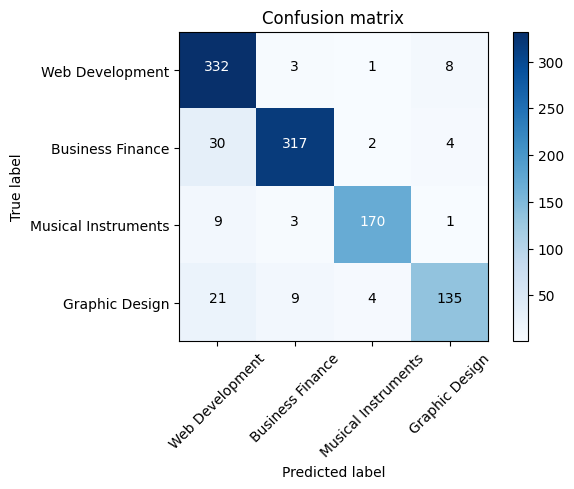

In [57]:
plot_confusion_matrix(cm,class_names)

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Classication Report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90       344
         1.0       0.95      0.90      0.93       353
         2.0       0.96      0.93      0.94       183
         3.0       0.91      0.80      0.85       169

    accuracy                           0.91      1049
   macro avg       0.92      0.90      0.91      1049
weighted avg       0.91      0.91      0.91      1049



In [60]:
# Classication Report
print(classification_report(y_true,y_pred,target_names=class_names))

                     precision    recall  f1-score   support

    Web Development       0.85      0.97      0.90       344
   Business Finance       0.95      0.90      0.93       353
Musical Instruments       0.96      0.93      0.94       183
     Graphic Design       0.91      0.80      0.85       169

           accuracy                           0.91      1049
          macro avg       0.92      0.90      0.91      1049
       weighted avg       0.91      0.91      0.91      1049



In [61]:
class_temp = predictions.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
# # # print(class_name)
class_names

### Making Single Prediction
+ sample as DF
+ apply pipeline

In [62]:
from pyspark.sql.types import StringType

In [63]:
ex1 = spark.createDataFrame([
    ("Building Machine Learning Apps with Python and PySpark",StringType())
],
# Column Name
["course_title"]

)

In [64]:
ex1.show()

+--------------------+---+
|        course_title| _2|
+--------------------+---+
|Building Machine ...| {}|
+--------------------+---+



In [65]:
# Show Full 
ex1.show(truncate=False)

+------------------------------------------------------+---+
|course_title                                          |_2 |
+------------------------------------------------------+---+
|Building Machine Learning Apps with Python and PySpark|{} |
+------------------------------------------------------+---+



In [66]:
# Predict
pred_ex1 = lr_model.transform(ex1)

In [67]:
pred_ex1.show()

+--------------------+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|        course_title| _2|            mytokens|     filtered_tokens|         rawFeatures|  vectorizedFeatures|       rawPrediction|         probability|prediction|
+--------------------+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|Building Machine ...| {}|[building, machin...|[building, machin...|(3678,[57,81,90,1...|(3678,[57,81,90,1...|[11.9345470701168...|[0.99999945445355...|       0.0|
+--------------------+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+



In [68]:
pred_ex1.columns

['course_title',
 '_2',
 'mytokens',
 'filtered_tokens',
 'rawFeatures',
 'vectorizedFeatures',
 'rawPrediction',
 'probability',
 'prediction']

In [69]:
pred_ex1.select('course_title','rawPrediction','probability','prediction').show()

+--------------------+--------------------+--------------------+----------+
|        course_title|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|Building Machine ...|[11.9345470701168...|[0.99999945445355...|       0.0|
+--------------------+--------------------+--------------------+----------+



In [70]:
label_dict

{'Web Development': 0.0,
 'Business Finance': 1.0,
 'Musical Instruments': 2.0,
 'Graphic Design': 3.0}

In [71]:
### Save and Load Model

In [ ]:
# Saving Model
modelPath = "models/pyspark_lr_model"
lr_model.save(modelPath)

In [ ]:
# Loading pickled model via pipeline api
from pyspark.ml.pipeline import PipelineModel
persistedModel = PipelineModel.load(modelPath)

### This was a learning experience for using PySpark, further we can look into integrating Databricks with it

### Finally some key Differences Between PySpark and Regular Python (Scikit-Learn)

- Data Structures:

PySpark: Uses DataFrames and RDDs (Resilient Distributed Datasets) for data manipulation, which are optimized for distributed computing. It can handle large-scale data that may not fit in memory.

Scikit-Learn: Uses Pandas DataFrames and NumPy arrays, which are suitable for in-memory operations and smaller datasets.

- Machine Learning Pipeline:

PySpark: Supports the Pipeline API, which allows you to chain multiple transformations and models together in a structured way.

Scikit-Learn: Also supports pipelines, but the syntax and functionality differ.

- Model Training:

PySpark: Models are trained using the .fit() method on DataFrames, and transformations are performed on DataFrames as well.

Scikit-Learn: Models are trained using .fit() on NumPy arrays or Pandas DataFrames, and predictions are made with the .predict() method.

- Data Splitting:

PySpark: Uses randomSplit() on DataFrames to split the data, which does not require the target variable to be separate from the features.

Scikit-Learn: Uses train_test_split() from sklearn.model_selection, which requires separate input features (X) and target labels (y).

- Evaluation Metrics:

PySpark: Provides evaluators in pyspark.ml.evaluation for various metrics like accuracy, precision, recall, etc.

- Scikit-Learn: Uses various scoring functions directly, such as accuracy_score, f1_score, etc.

- Performance:

PySpark: Designed for distributed and parallel processing, making it suitable for large datasets and big data applications.

Scikit-Learn: Optimized for speed on smaller datasets, typically running on a single machine.